In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

%load_ext autoreload
%autoreload 2


In [2]:
from modelclass import model

latex = True    # Setting to allow the diagrams to be incorporated in latex

mpak,baseline = model.modelload('../models/pak.pcim',alfa=0.7,run=1)

mpak.model_description="World Bank climate aware model of Pakistan as described in Burns et al. (2019)"
mpak.model_description
mpak.periode=2100

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [3]:
mpak

<
Model name                              :                  PAK 
Model structure                         :         Simultaneous 
Number of variables                     :                  839 
Number of exogeneous  variables         :                  461 
Number of endogeneous variables         :                  378 
>

In [4]:

mpak.current_per

Index([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028, 2029, 2030],
      dtype='int64')

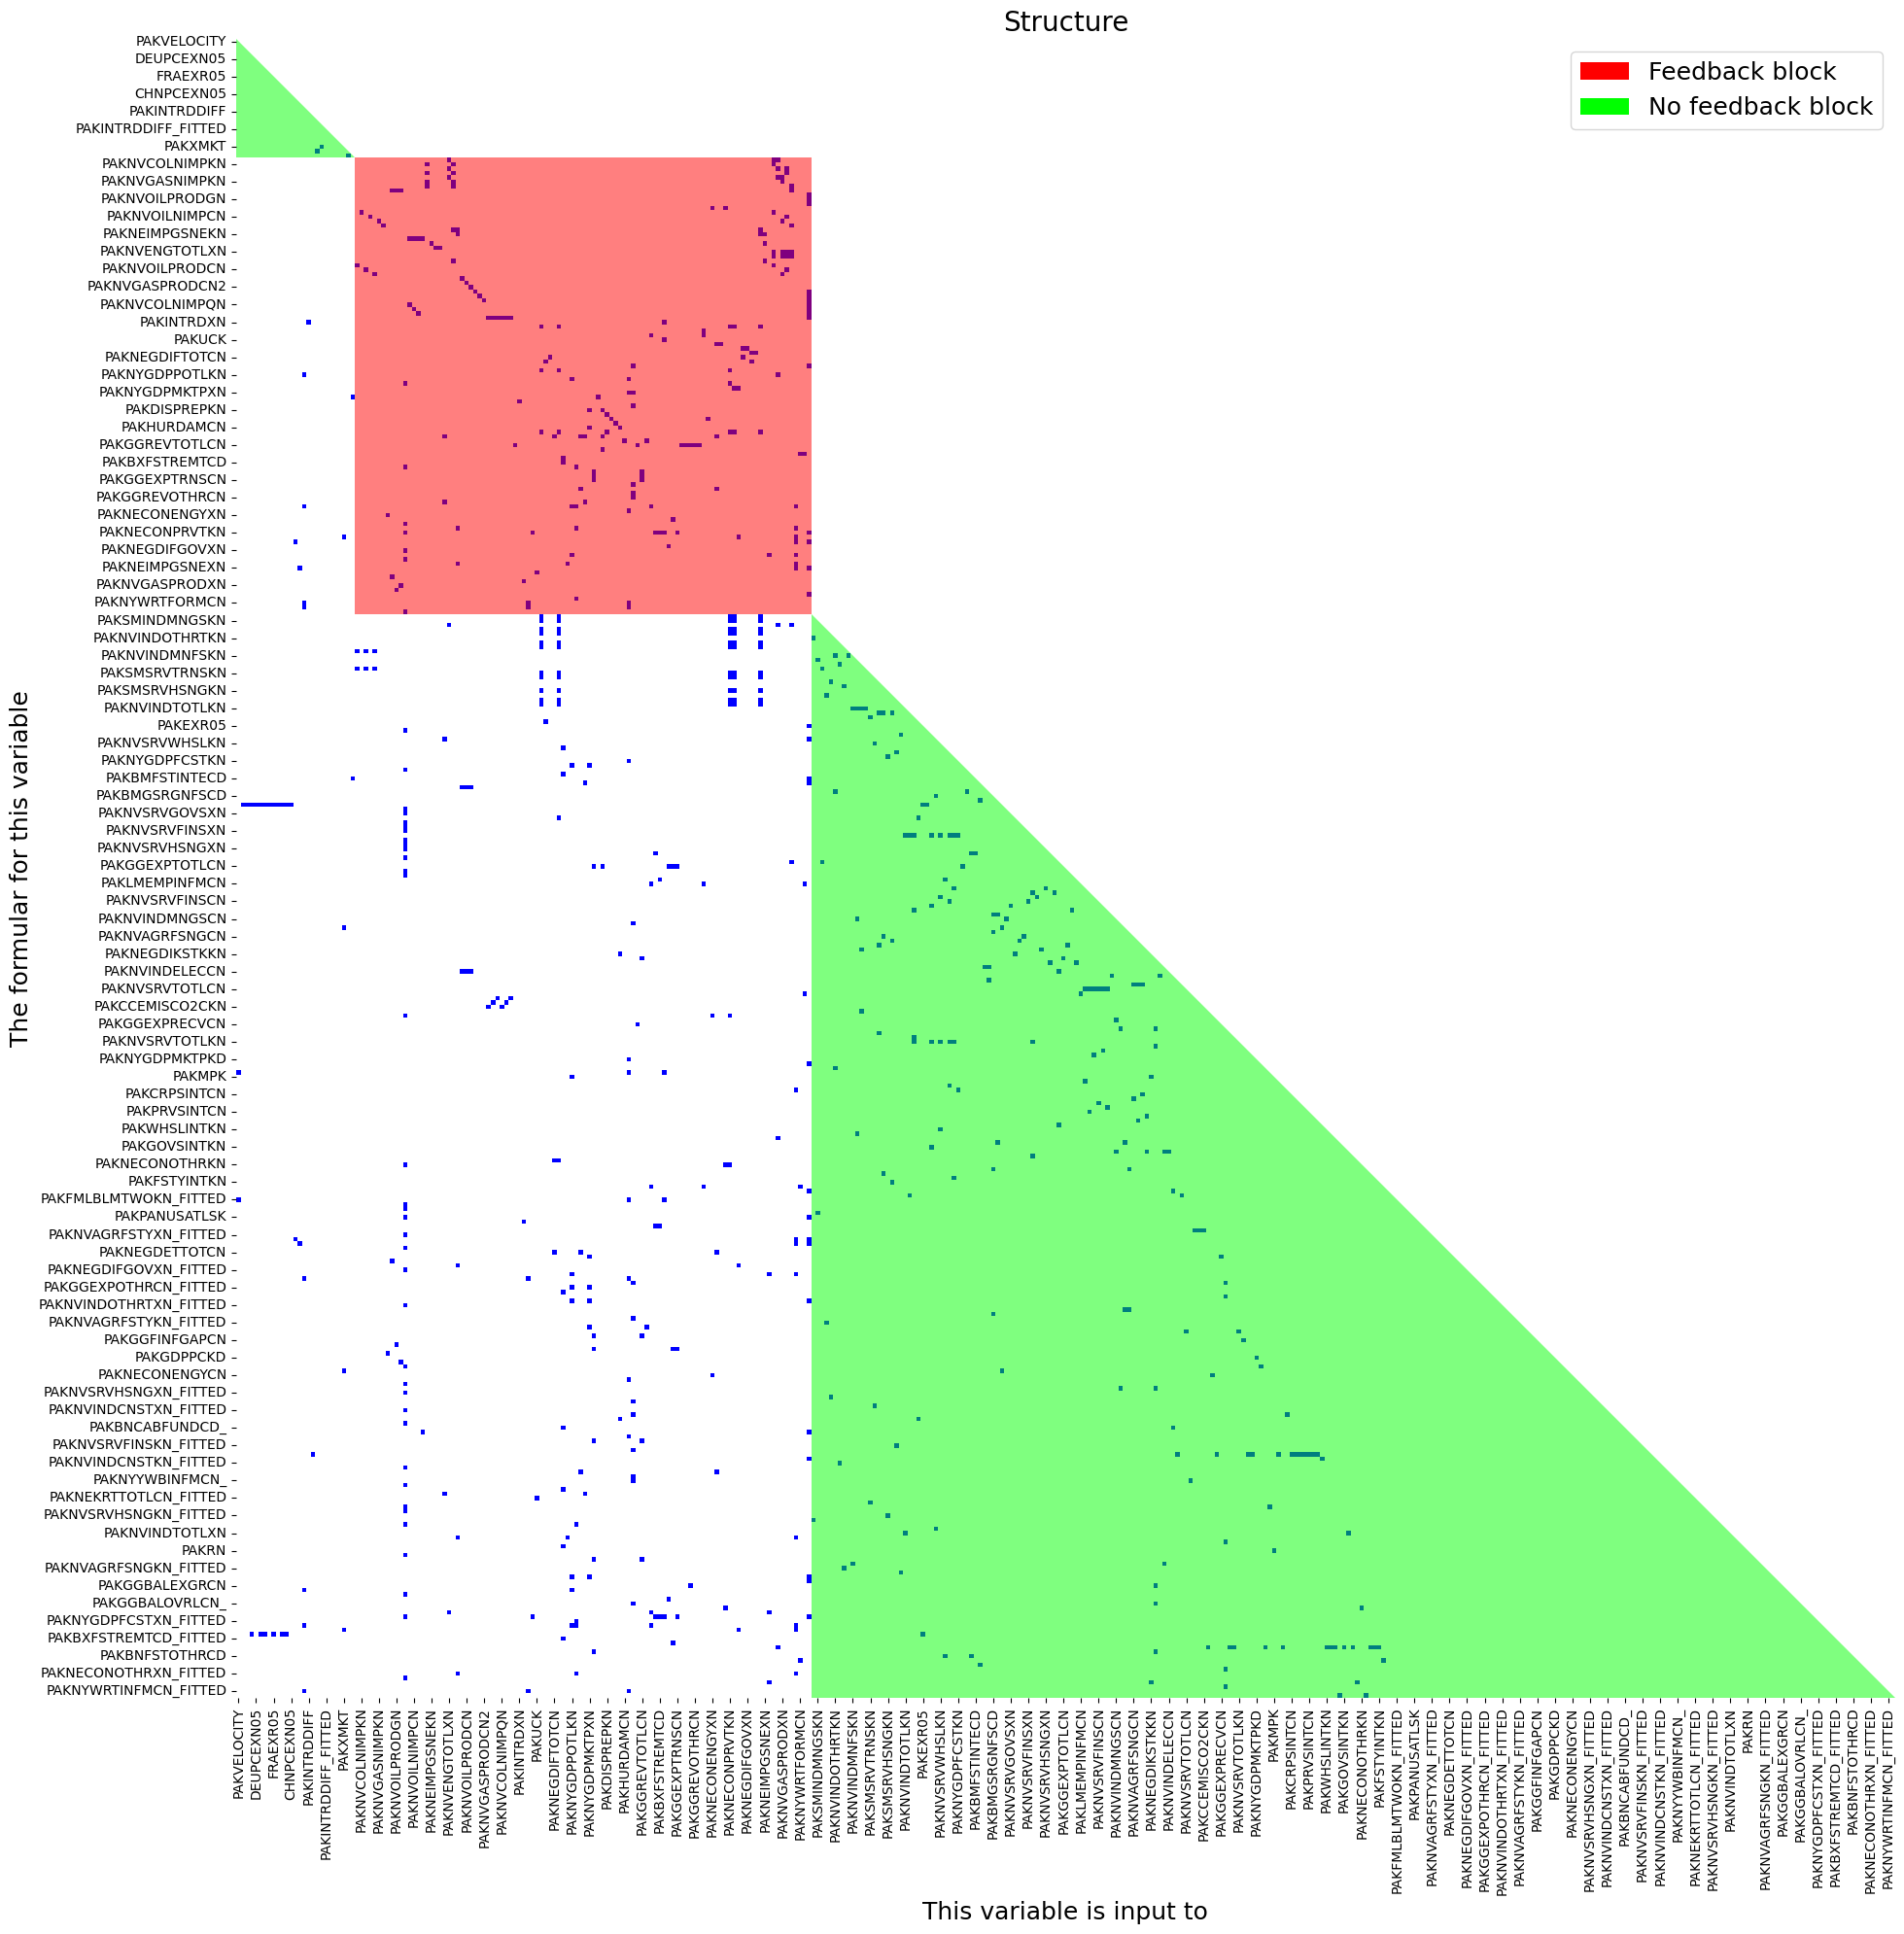

In [5]:
mpak.plotadjacency(size=(20,20),nolag=0);

In [6]:
mpak.PAKNECONPRVTKN.frml

Endogeneous: PAKNECONPRVTKN: HH. Cons Real
Formular: FRML <DAMP,STOC> PAKNECONPRVTKN = (PAKNECONPRVTKN(-1)*EXP(PAKNECONPRVTKN_A+ (-0.2*(LOG(PAKNECONPRVTKN(-1))-LOG(1.21203101101442)-LOG((((PAKBXFSTREMTCD(-1)-PAKBMFSTREMTCD(-1))*PAKPANUSATLS(-1))+PAKGGEXPTRNSCN(-1)+PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1)))+0.763938860758873*((LOG((((PAKBXFSTREMTCD-PAKBMFSTREMTCD)*PAKPANUSATLS)+PAKGGEXPTRNSCN+PAKNYYWBTOTLCN*(1-PAKGGREVDRCTXN/100))/PAKNECONPRVTXN))-(LOG((((PAKBXFSTREMTCD(-1)-PAKBMFSTREMTCD(-1))*PAKPANUSATLS(-1))+PAKGGEXPTRNSCN(-1)+PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1))))-0.0634474791568939*DURING_2009-0.3*(PAKFMLBLPOLYXN/100-((LOG(PAKNECONPRVTXN))-(LOG(PAKNECONPRVTXN(-1)))))) )) * (1-PAKNECONPRVTKN_D)+ PAKNECONPRVTKN_X*PAKNECONPRVTKN_D  $

PAKNECONPRVTKN  : HH. Cons Real
DURING_2009     : 
PAKBMFSTREMTCD  : Imp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD  : Exp., Remittances (BOP), US$ mn
PAKFMLBLPOLYXN  : Key Policy Interest Rate
PAKGG

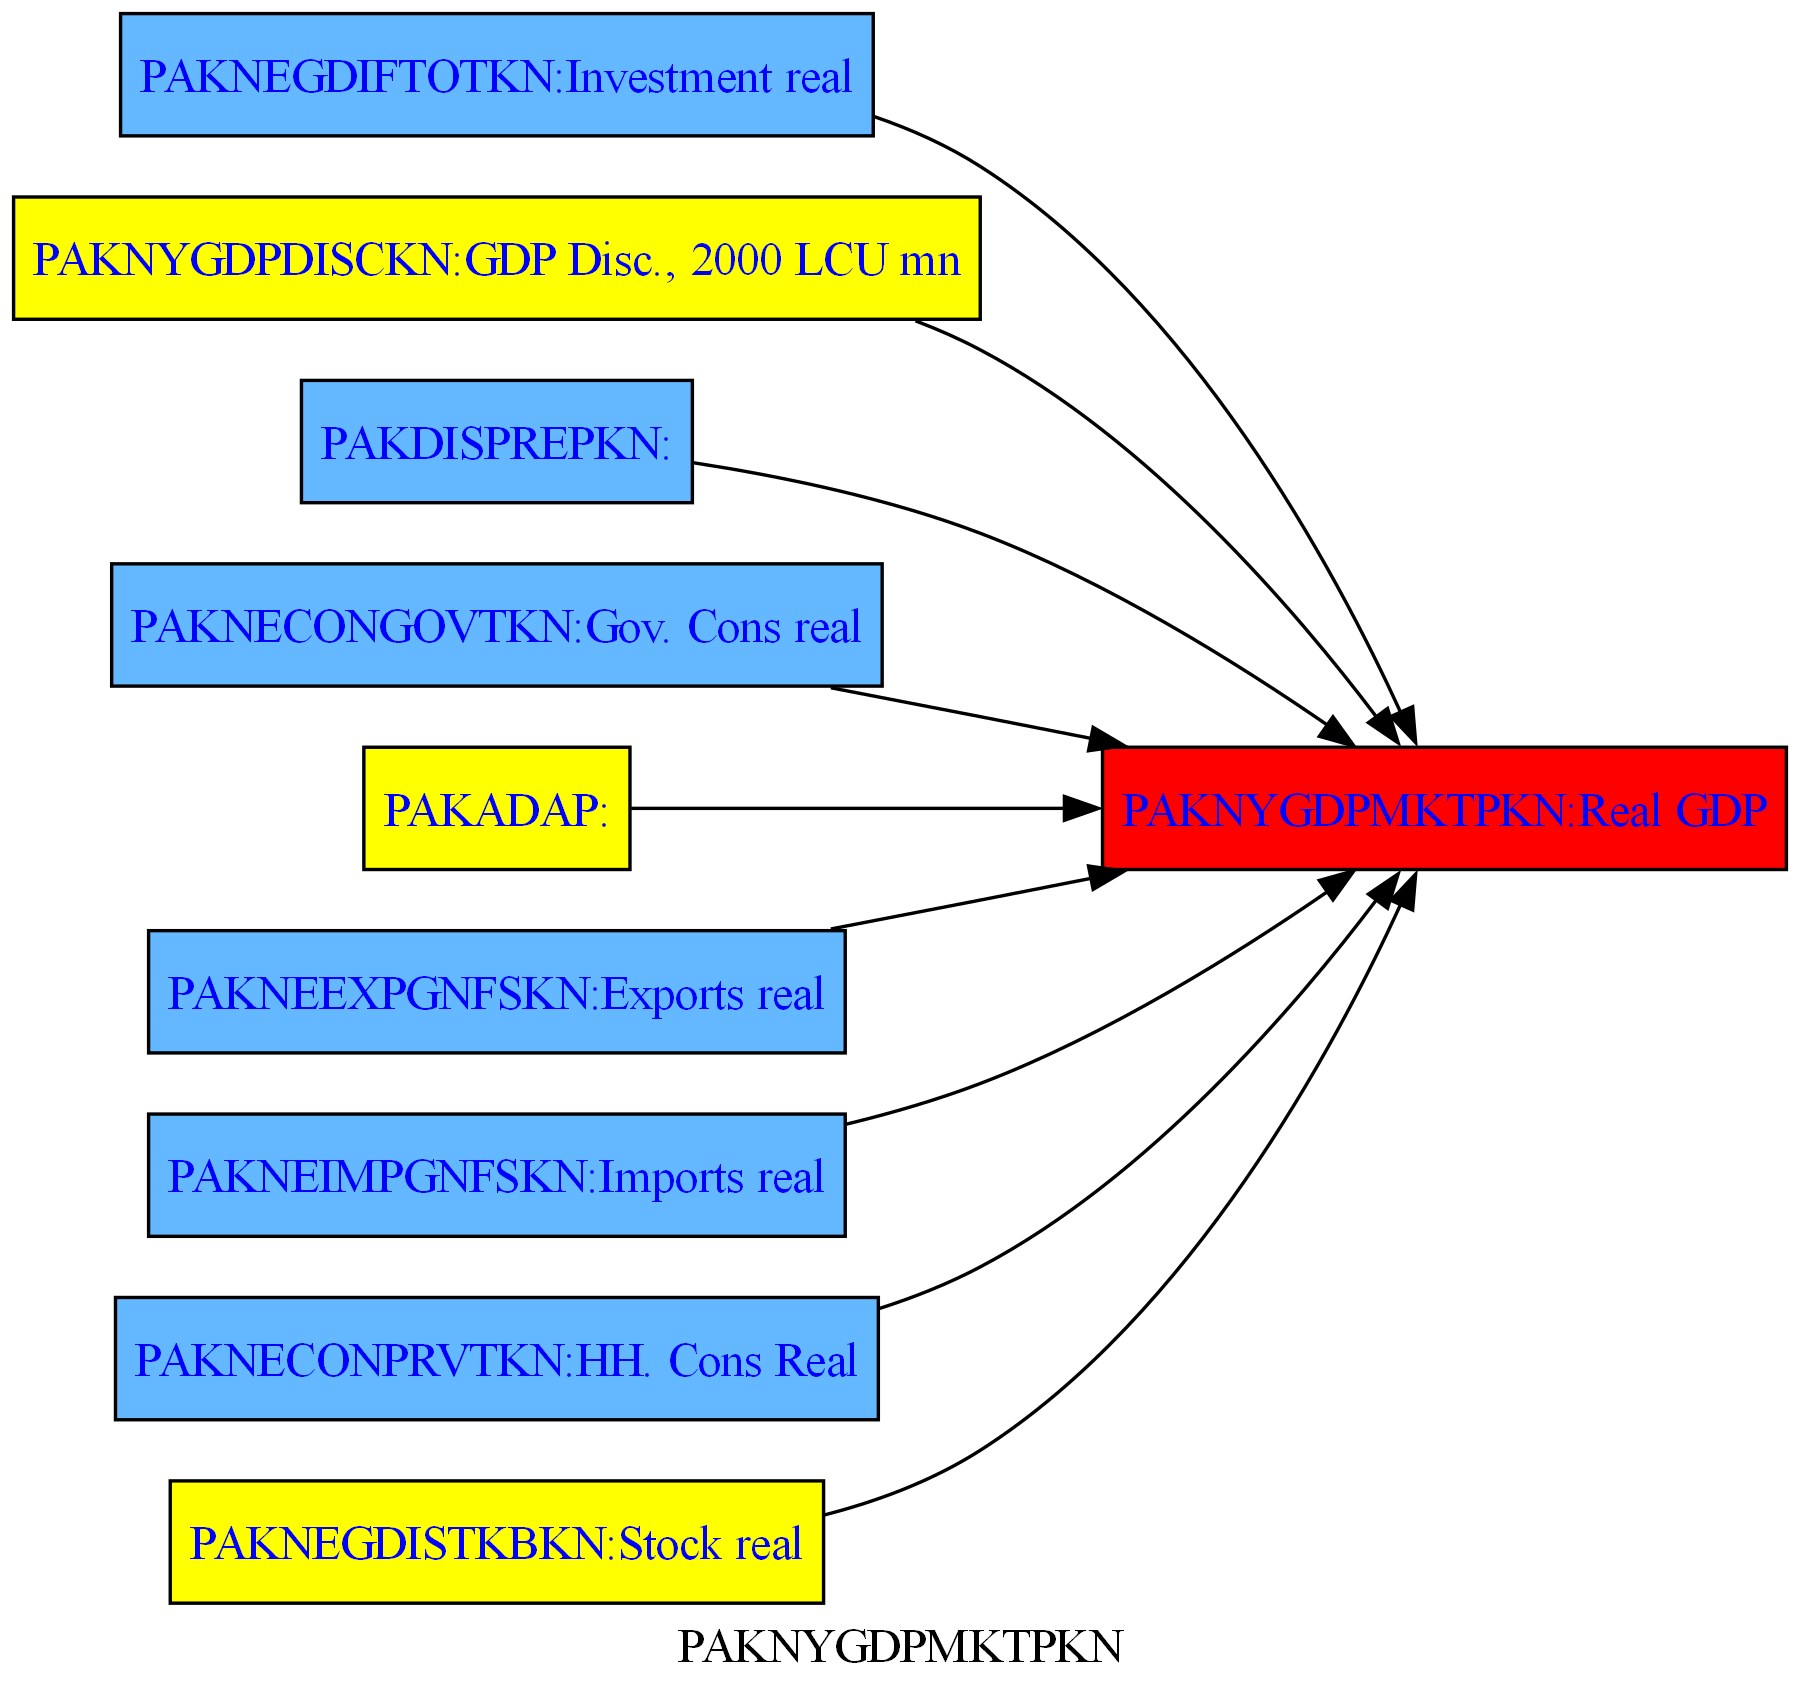

In [7]:
mpak.PAKNYGDPMKTPKN.tracepre(png=latex)

In [8]:

alternative  =  baseline.upd("<2025 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 30")
result = mpak(alternative,2020,2100) # simulates the model 

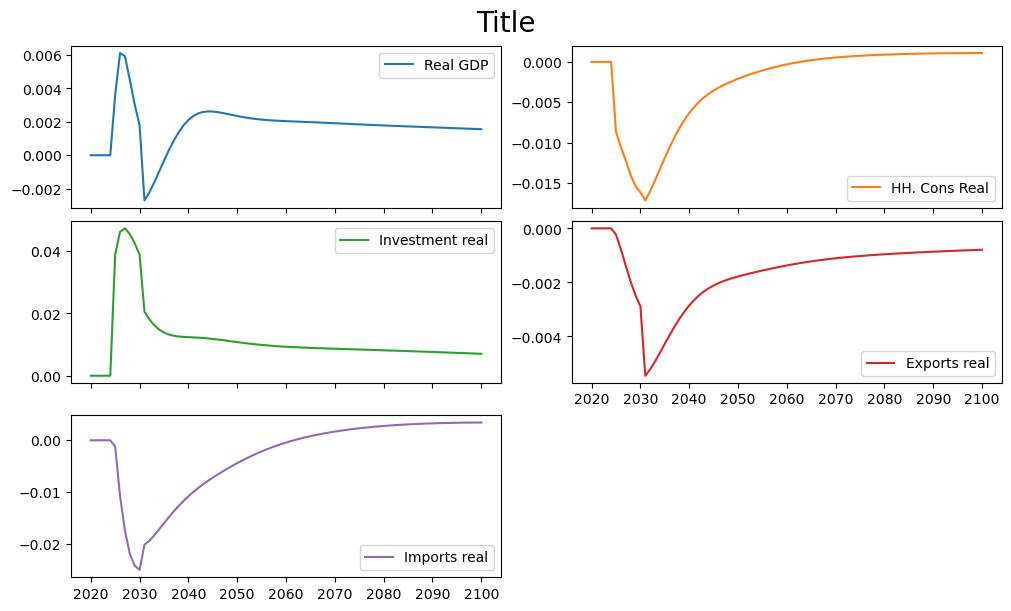

In [9]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEEXPGNFSKN PAKNEIMPGNFSKN'].difpctlevel.rename().plot()

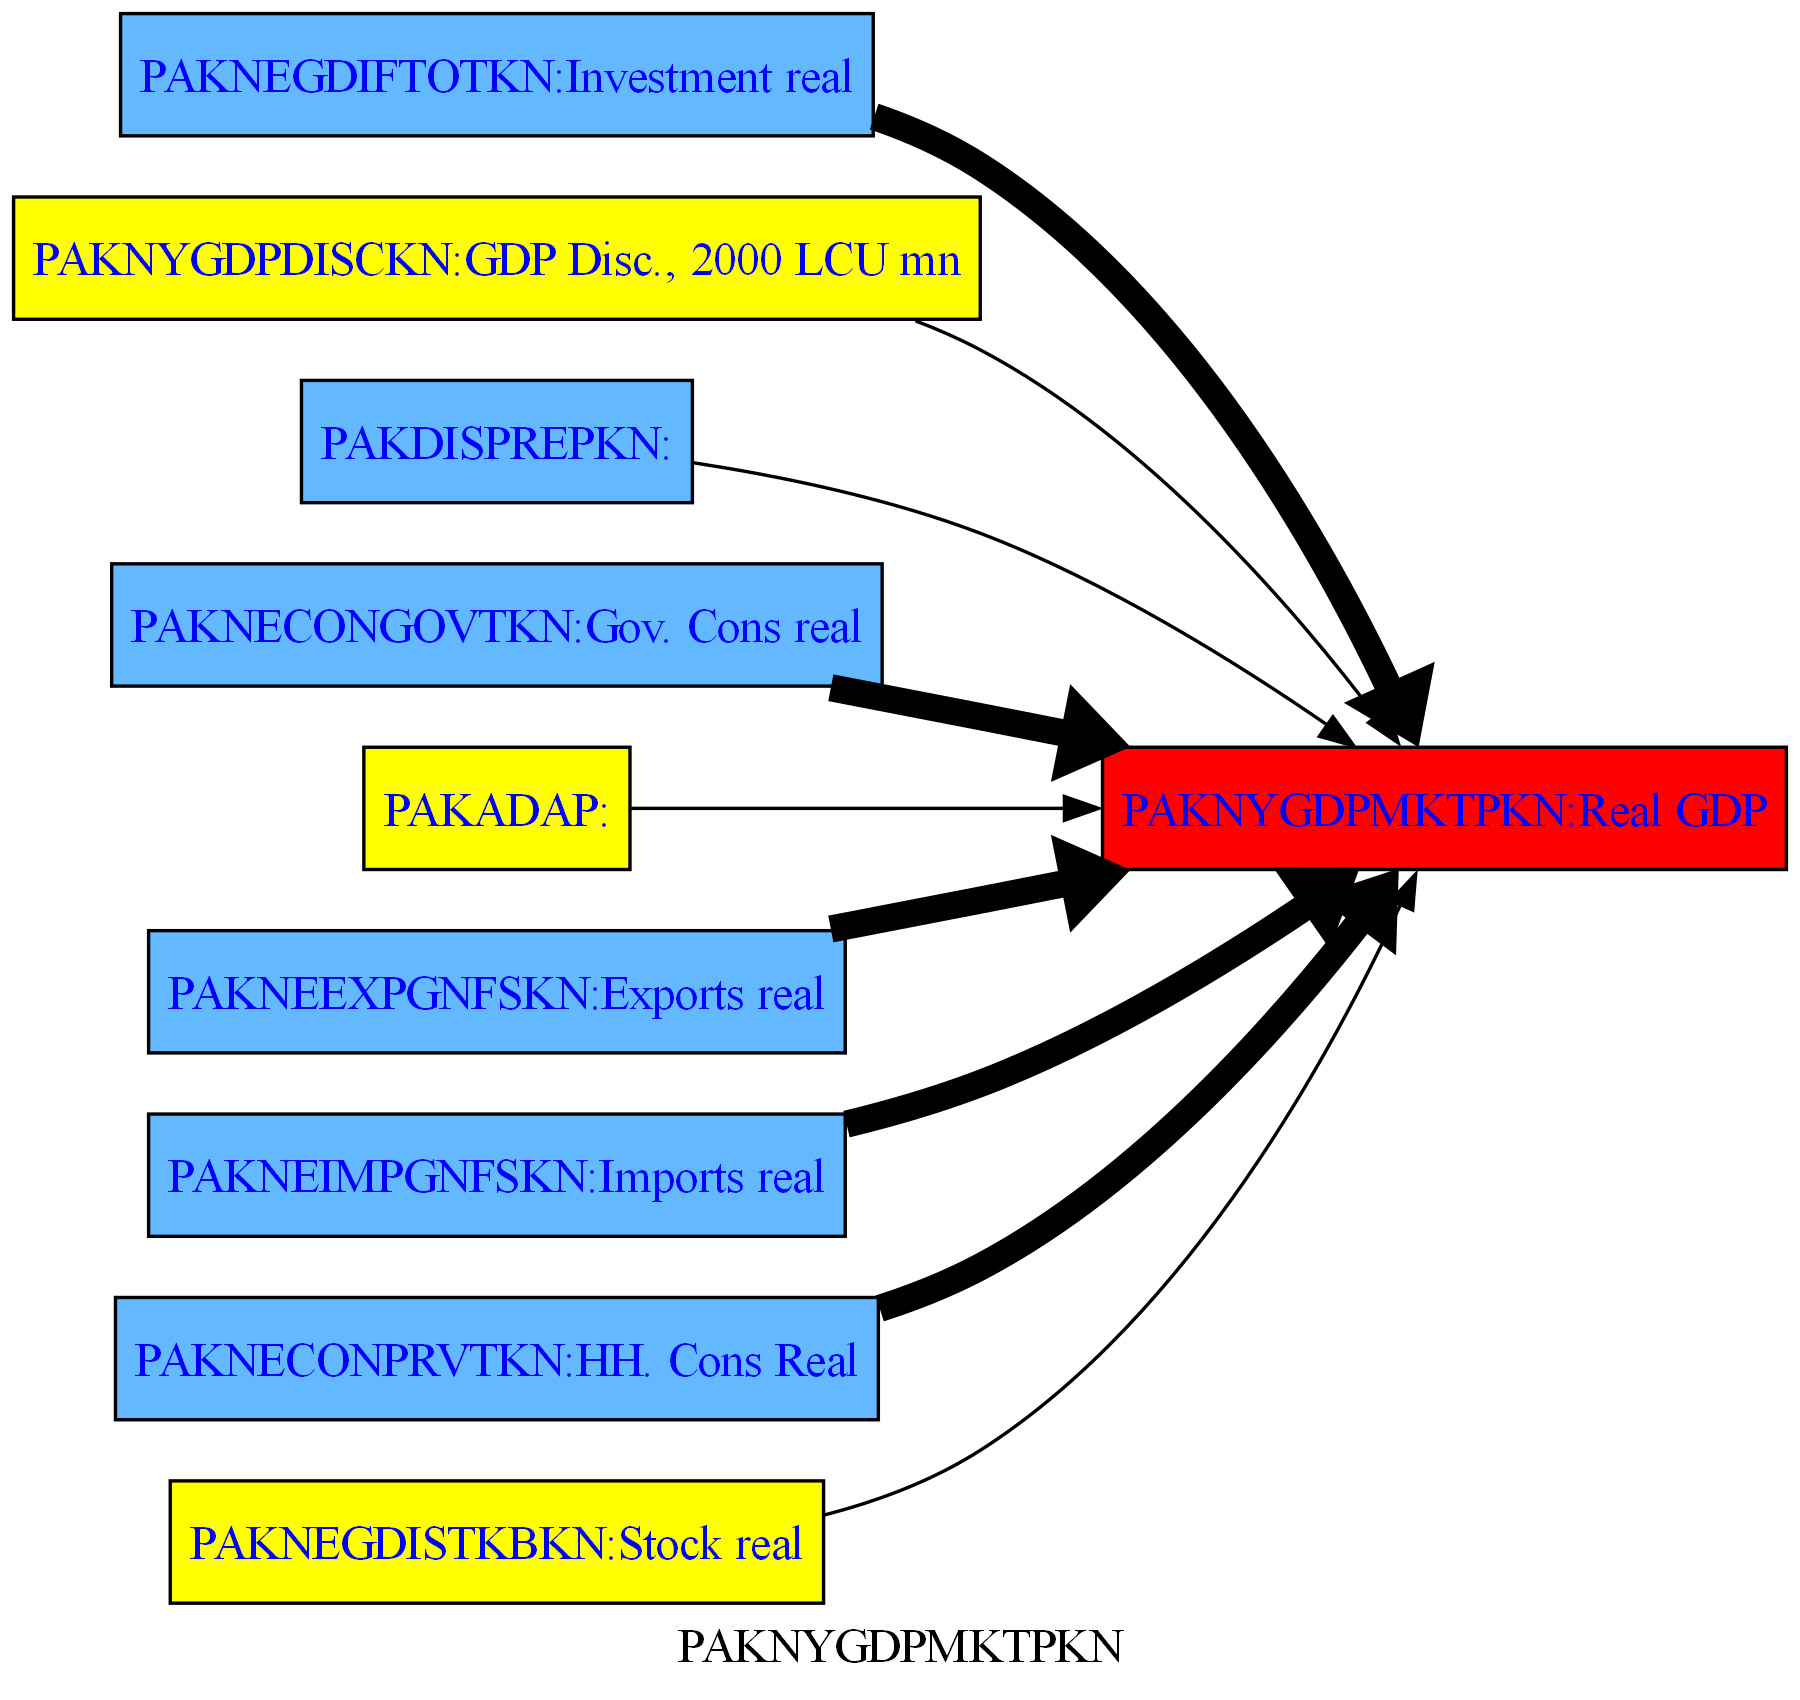

In [10]:
mpak.PAKNYGDPMKTPKN.tracepre(png=latex)

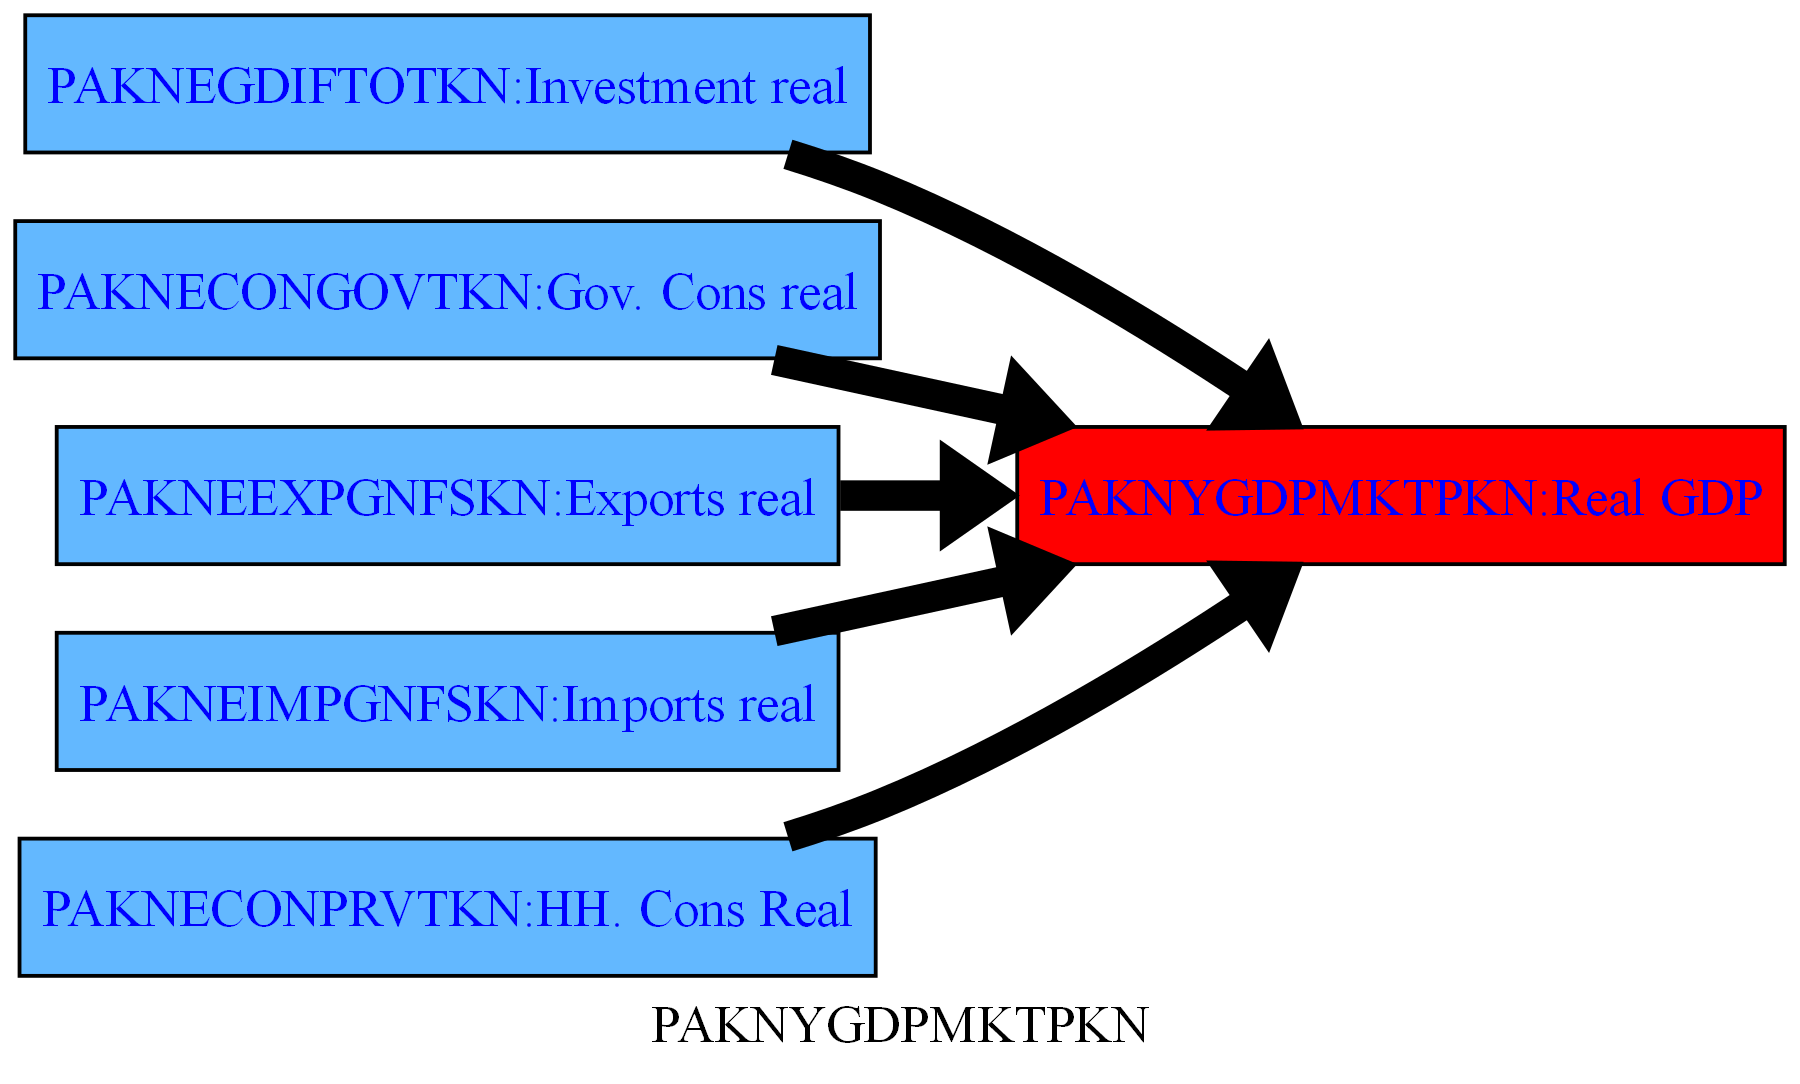

In [11]:
gg=mpak.PAKNYGDPMKTPKN.tracepre(filter=20,png=latex)
gg

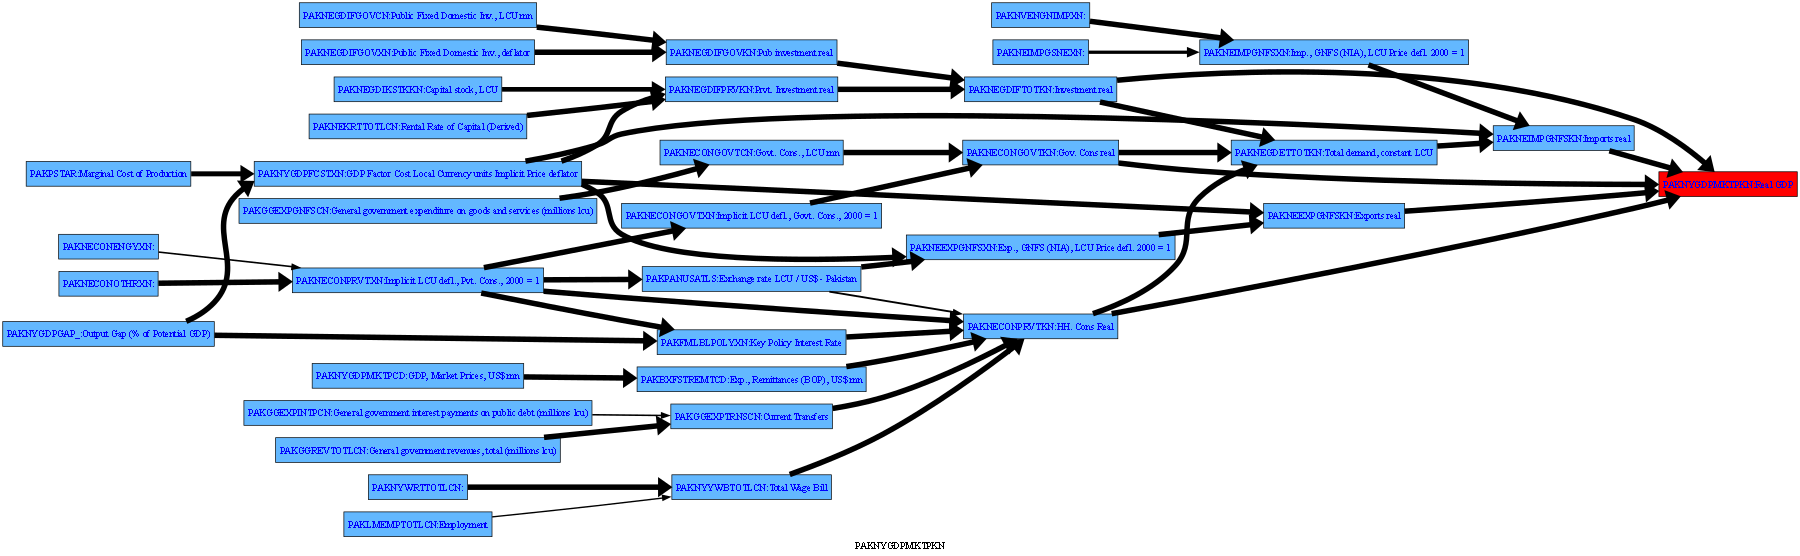

In [12]:
mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,up=3,png=latex,)

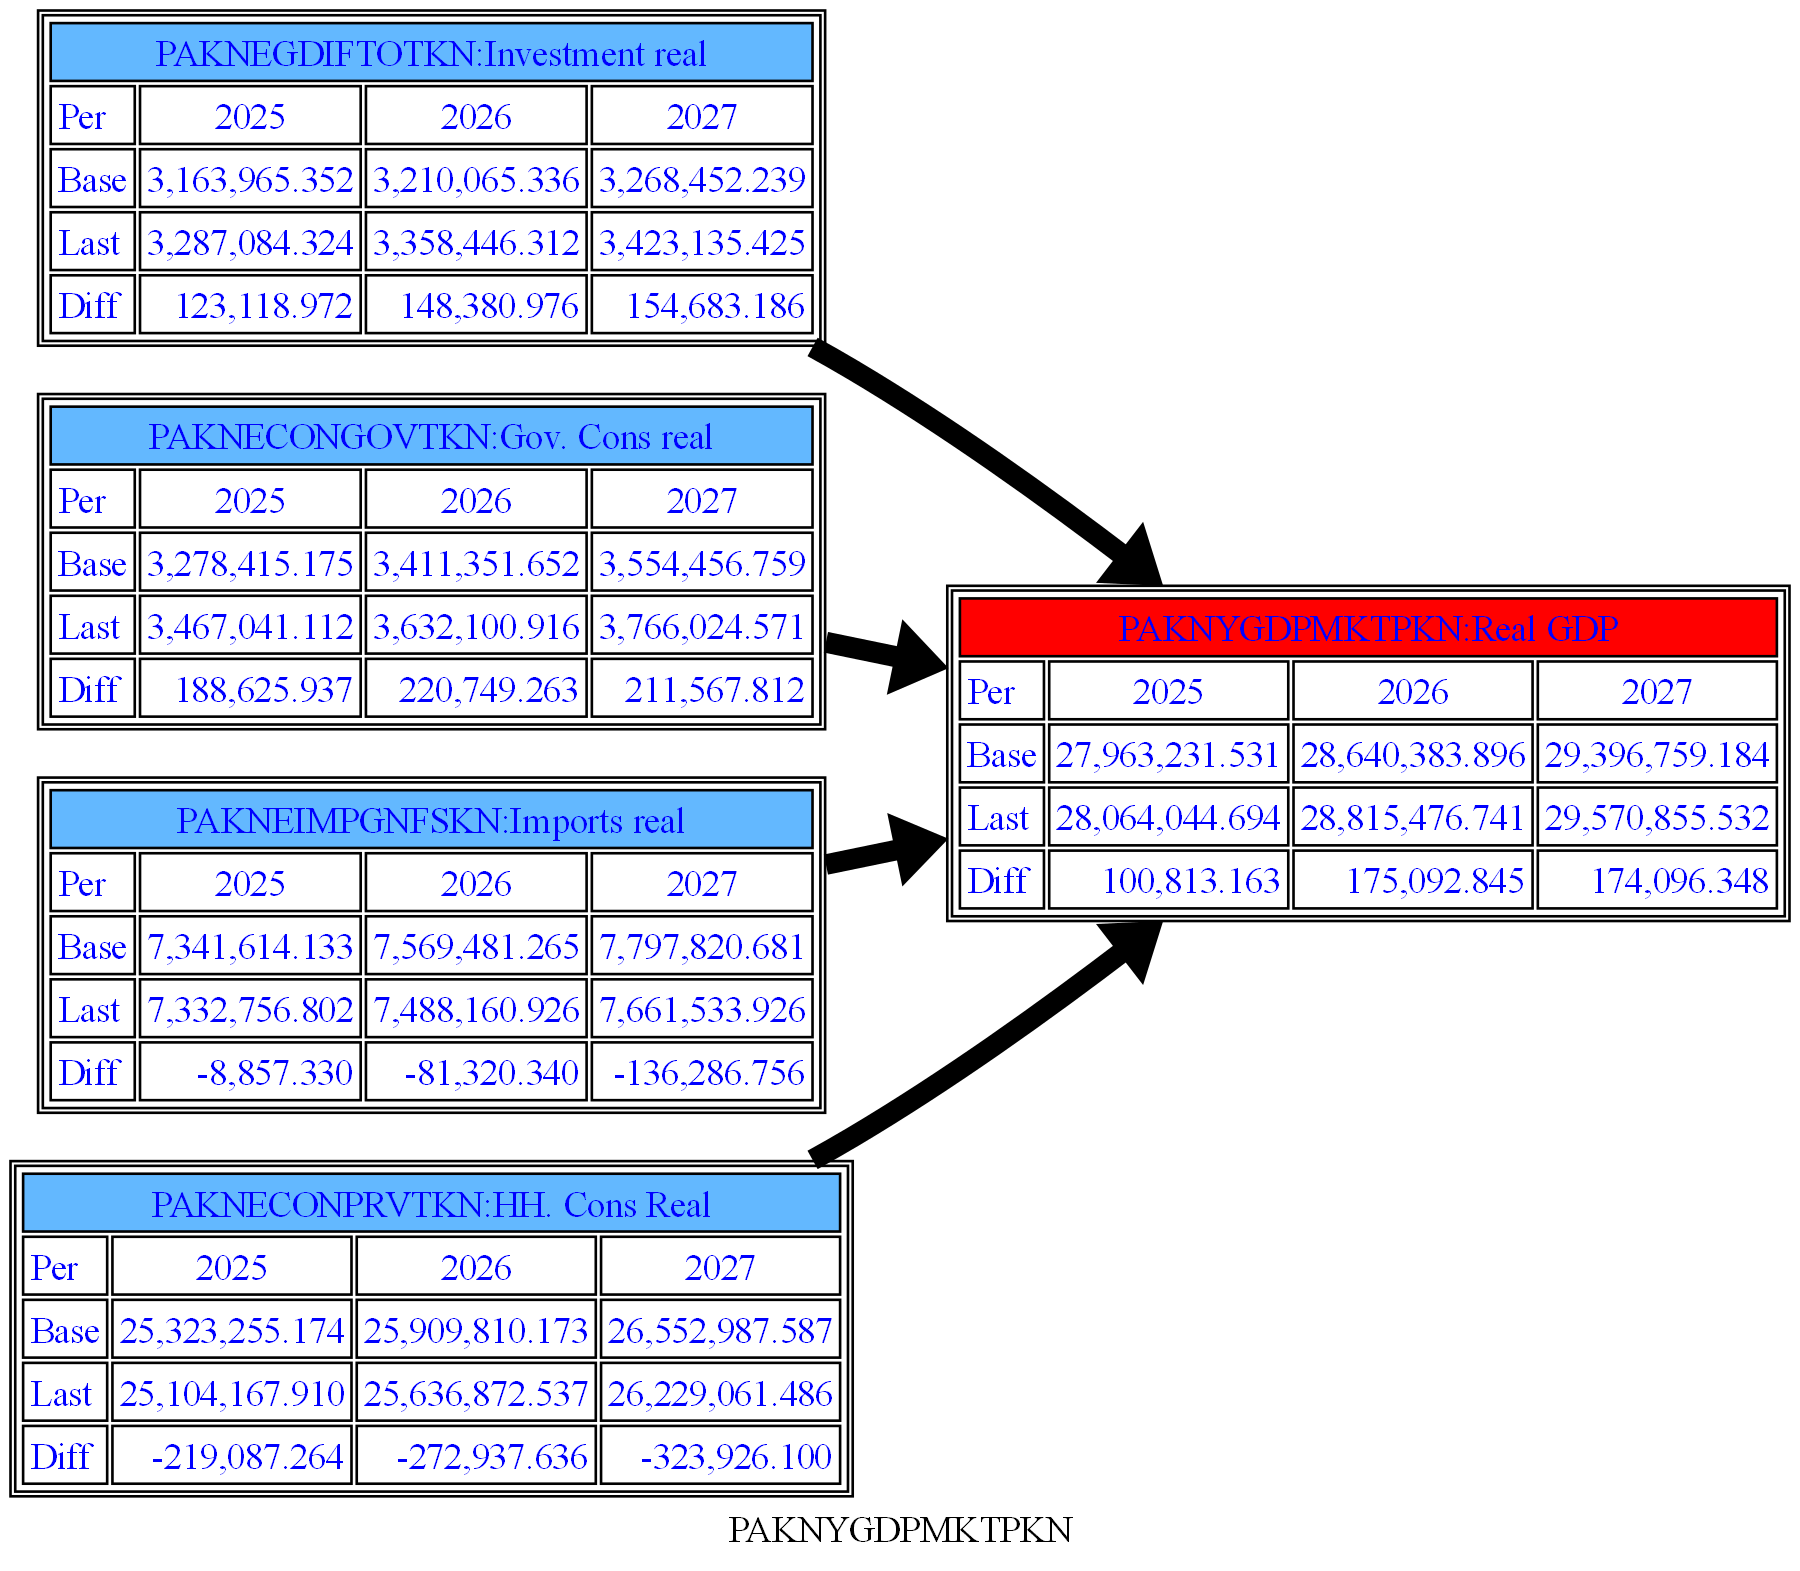

In [13]:
with mpak.set_smpl(2025,2027):
    mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,fokus2all=True,png=latex)

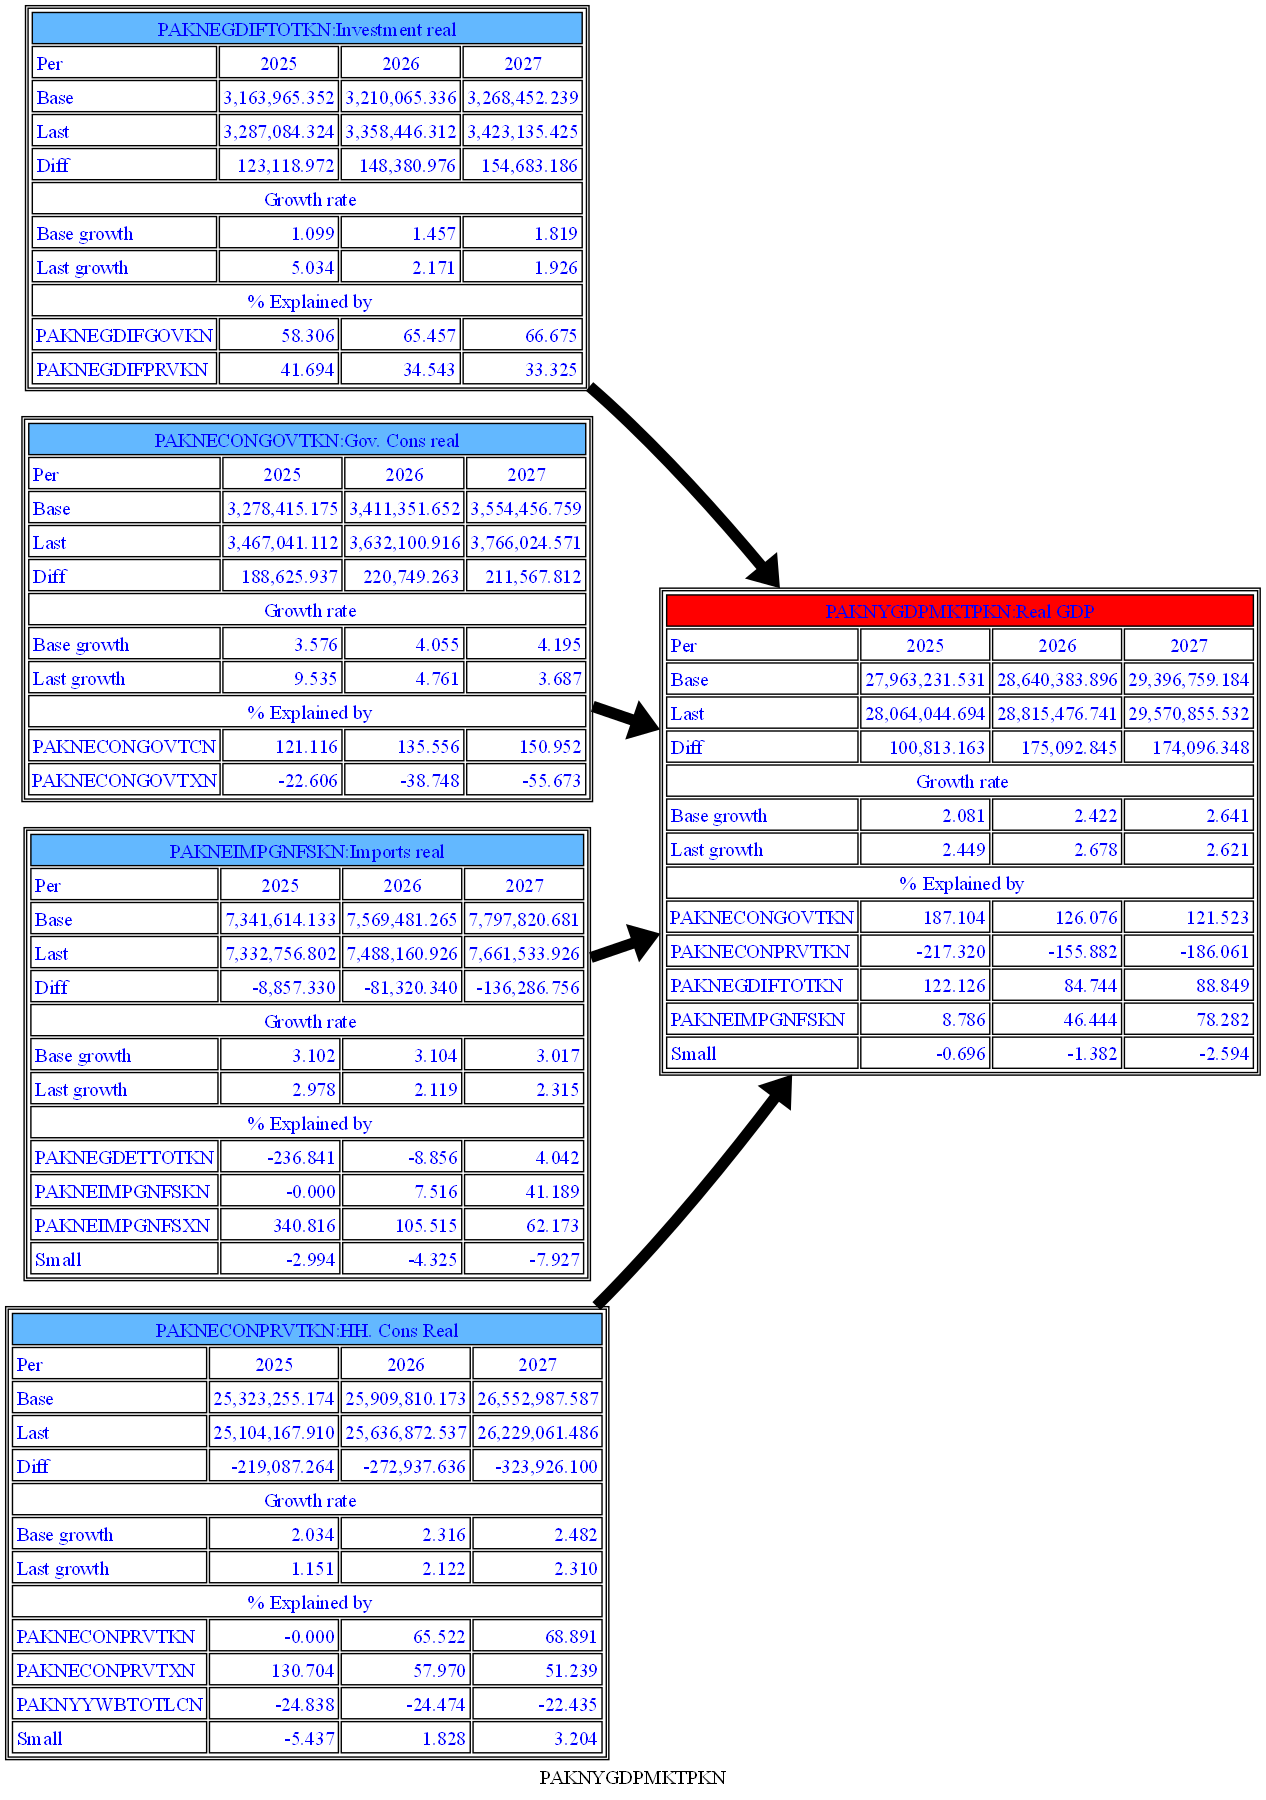

In [14]:
with mpak.set_smpl(2025,2027):
    mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,                                 
                                 fokus2all=True,
                                 attshow=True,
                                 growthshow = True,
                                png=latex)

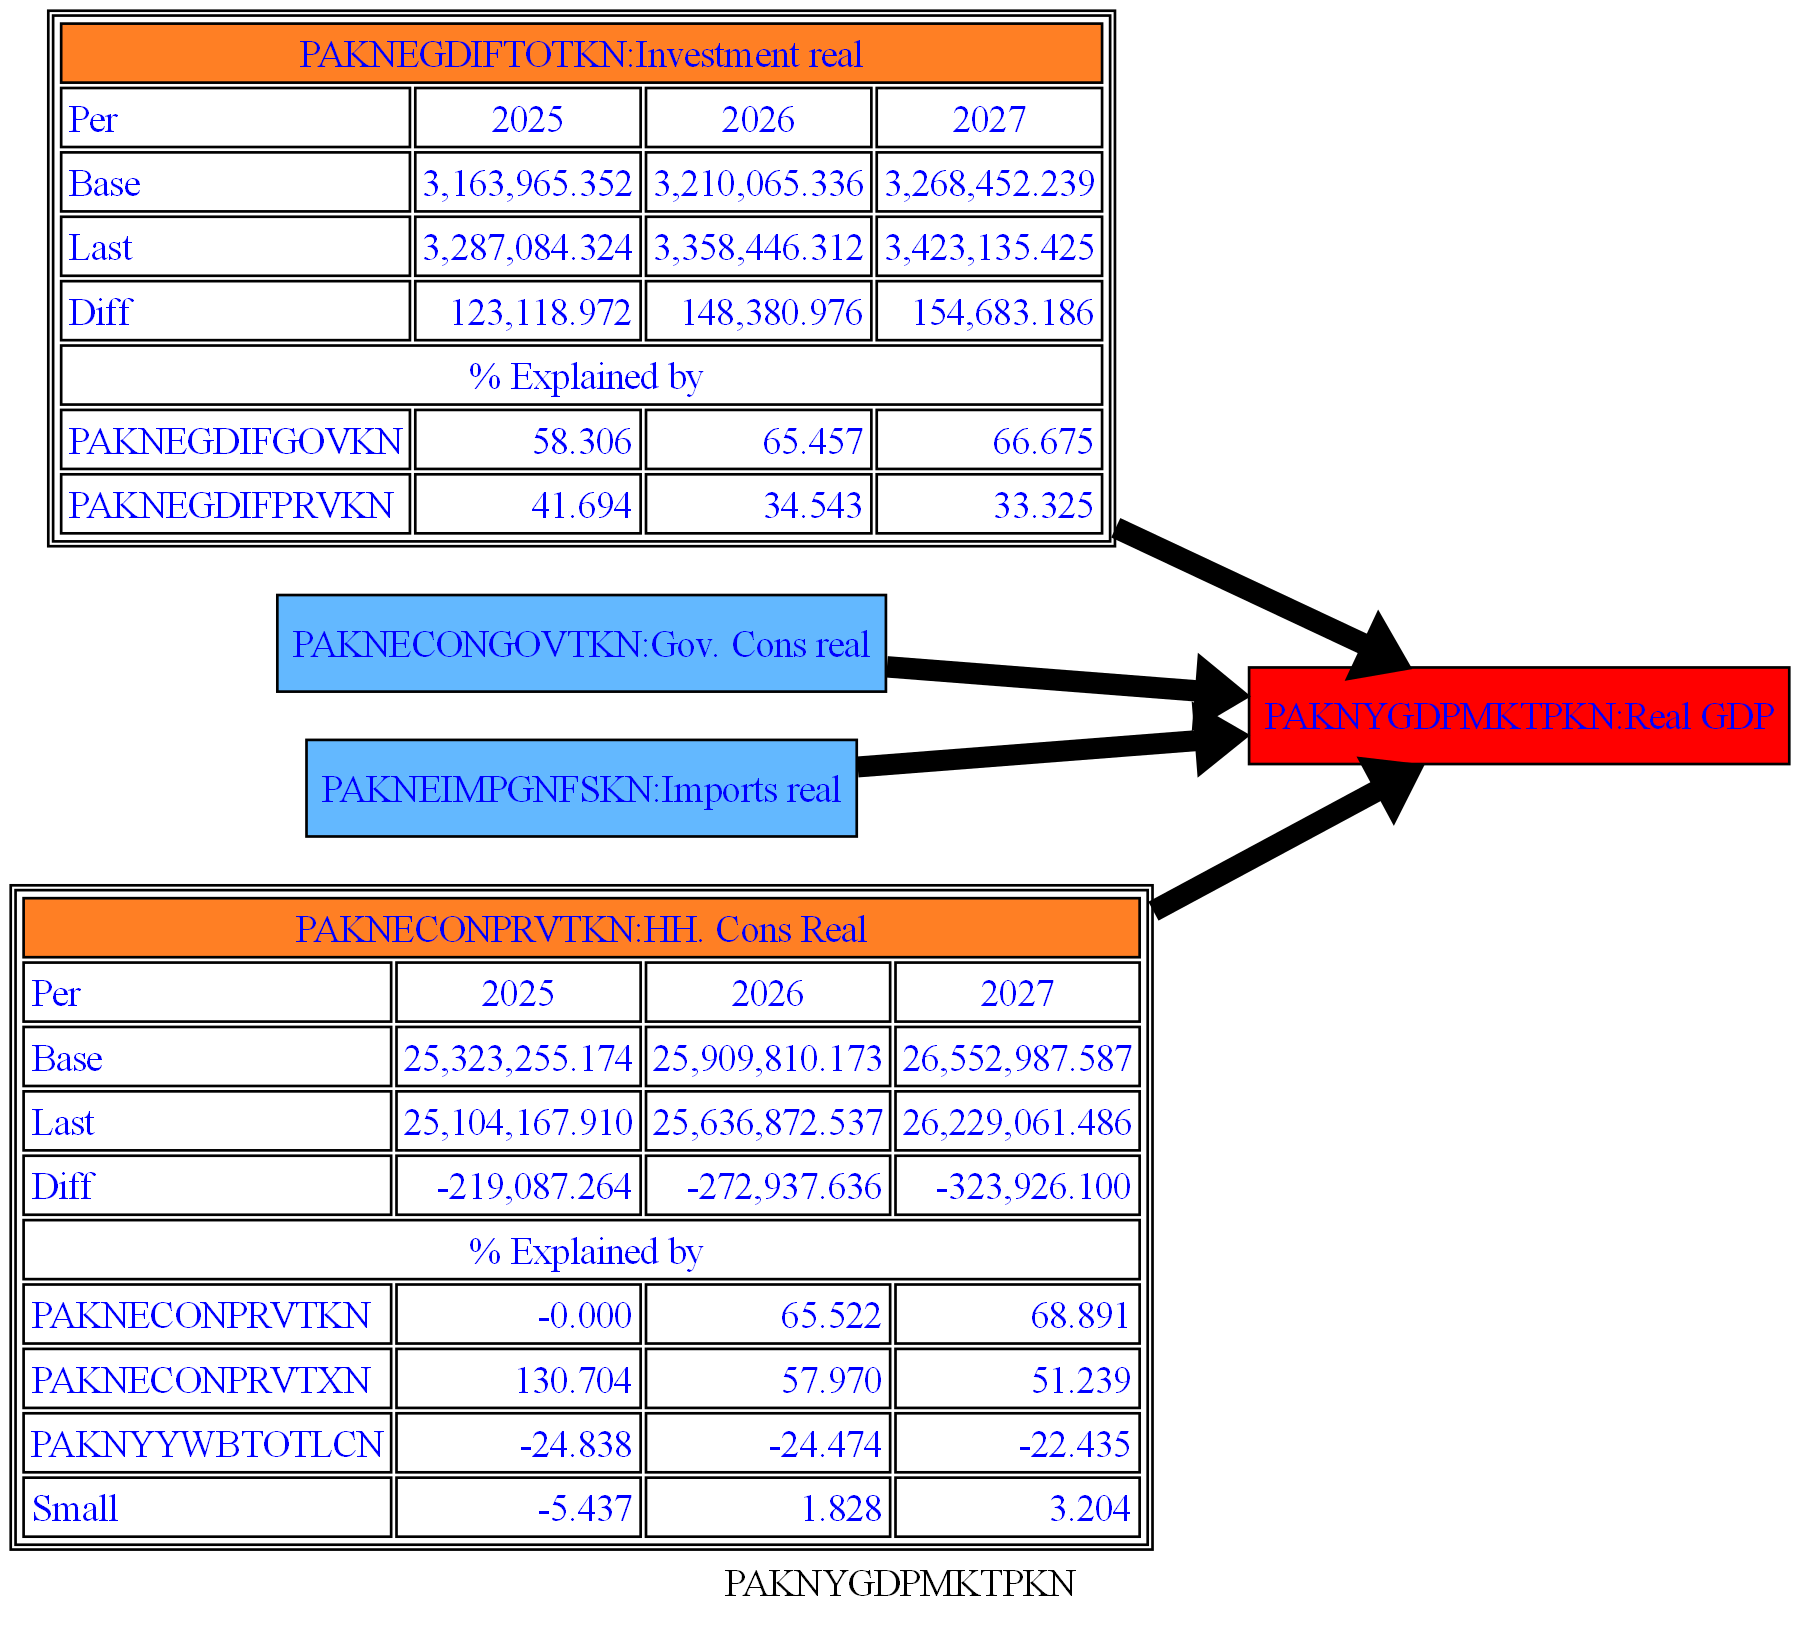

In [15]:
with mpak.set_smpl(2025,2027):
    mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,                                 
                                 fokus2='PAKNEGDIFTOTKN PAKNECONPRVTKN',
                                png=1,svg=1,pdf=1,attshow=1)

In [16]:
## suspended in developement, 
#mpak.PAKNECONPRVTKN.tracedep(down=3,filter=20)